# Assigment 5

## Part 1. Exploratory Data Visualization, two variables

### Figure 3.1<br>

It means that even though we can see a very strong relationship between 2 variables, it might be some random error implicit in the data. This radnom error could be represtented as white noise. The error might be due to calibration errors in the machines used to capture the force (in this example) or other measurements, atmospheric conditions... 
Aditionally, if you inspect the plot carefully, you could see that the points are not completely following a perfect line, that could be due to the randomized error.

**Real-World example multivariate relationship**
There are plently of examples of multivariate relationship in the real world. some examples could be:
- House pricing: Price of the house depends on square meters, neighbourhood, city, age of the house, number of bedrooms....
- Cancer detection: weight of the tumor, size of the tumor, consistency of the tumor...

### Methods for smoothing noisy data <br>

Janet proposes two methods:
- Weighted splines.
- LOESS (weighted regression).

Aditinally, we could use of of those:
- **Moving average:** This involves taking the average of a small number of adjacent data points to create a smoothed curve. The number of adjacent data points used to calculate the moving average is referred to as the "window size" or "span."
- **Kernel density estimation (KDE):** This is a non-parametric method that estimates the probability density function of the data. KDE can be used to create a smoothed curve that represents the distribution of the data.
- **Gaussian process regression:** This is a machine learning technique that can be used to model the relationship between two variables in a scatter plot. Gaussian process regression estimates a distribution over possible functions that could describe the relationship between the two variables, and can be used to create a smoothed curve.
- **Polynomial regression:** This involves fitting a polynomial function to the data, which can be used to create a smoothed curve that represents the relationship between the two variables.
- **Cubic splines:** This is a method that involves fitting a piecewise cubic function to the data. Cubic splines can be used to create a smoothed curve that represents the relationship between the two variables.

### Residuals

The residuals are the remiander when we substract the smooth "trend" from the actual data. 
It's a good a idea to plot the residuals to identify the features of the residuals more clearly, features such as: if they have a trend, if they straddle to zero value, if they are symetrically distributed... if they display any of this features it might be that the model is not appropoate for the data. 

### Smooth tube 

The smoothing tube is a way to identify the confidence we could have of each datapoint for the contribution on the smooth curve. Aditionally, smooth tubes can be a powerful tool for understanding the pattres and trends in the data, and for identifying areas where there may be significant variation or uncertainty.

### Banking 
The idea behind banking is therefore to adjust the aspect ratio of the entire plot in such a way that most slopes are at an approximate 45 degree angle. Because we can recognize change (i.e., the slopes of curves) most easily if they make approximately
a 45 degree angle on the graph. It is much harder to see change if the curves are nearly horizontal or (even worse) nearly vertical.

## Exercise 2:

**What kind of relationships will a semi-log plot help you discover?**
A semi-log plot is a type of plot where one axis is plotted on a logarithmic scale while the other axis is plotted on a linear scale. This type of plot is particularly useful for visualizing data where one variable covers a wide range of values, while the other variable covers a relatively small range of values.

In general, a semi-log plot can help to uncover relationships between variables that are exponential or power-law in nature. For example, a semi-log plot may reveal a linear relationship between the logarithm of one variable and the non-logarithmic value of another variable, indicating an exponential or power-law relationship between the two variables.

Additionally, semi-log plot all relative changes along the axis with the logarithm have the same size no matter how large the corresponding absolute change. 

**What kind of functions will loglog plots help you see?**

This will render all power-law relations as straight lines —that is, as functions of the form $y = C*x^k$ or $y=\frac{C}{x^k}$, where C and k are constants.



In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt

In [2]:
df = pd.read_csv("../Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")

Text(0, 0.5, 'Occurences')

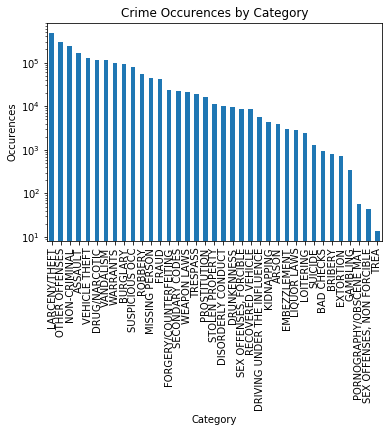

In [3]:
ax = df.groupby('Category').count()['PdId'].sort_values(ascending=False).plot.bar(title='Crime Occurences by Category', logy=True)
ax.set_xlabel("Category")
ax.set_ylabel("Occurences")

In [8]:
df_theft = df[df.Category == "LARCENY/THEFT"]

In [10]:
data = df_theft[(df_theft.Y < 50) & (df_theft.X<-122)]

In [11]:

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [20]:
count, lon, lat = np.histogram2d(data.Y, data.X, bins = [130,125])

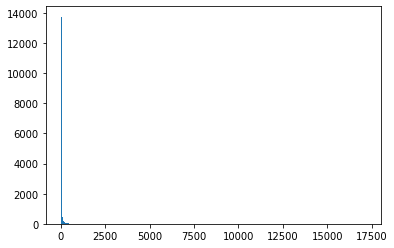

In [21]:
vals = count.flatten()
# plot histogram with 255 bins
b, bins, patches = plt.hist(vals, 500)
plt.xlim()
plt.show()

In [28]:
df_tmp = pd.DataFrame(count)
df_tmp.plot(kind="hist", logx=True, logy=True, legend=False, bins=500)